In [ ]:
!pip install --upgrade vaderSentiment #need to install this package

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#bringing in apply tweeets
df = pd.read_csv("../data/AppleCompanyTweets.csv")

#once again, need this object
analyzer = SentimentIntensityAnalyzer()


In [ ]:
#given type issues fill in
df['tweet_text'] = df['tweet_text'].fillna("")

#finding the sentiment scores with vader
vader_scores = df['tweet_text'].apply(analyzer.polarity_scores)
vader_df = pd.DataFrame(list(vader_scores)) #dataframe to hold rsults

#making this dataframe to hold results and initial dataframe
df_vaderApple = pd.concat([df, vader_df], axis=1)

#like in other files, function to find each total score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
#making new column in df to that actually runs the previous function
df_vaderApple['vader_sentiment'] = df_vaderApple['compound'].apply(classify_sentiment)

print(df_vaderApple[['tweet_text', 'compound', 'vader_sentiment']].head(10))

                                          tweet_text  compound vader_sentiment
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   -0.6800        Negative
1  @jessedee Know about @fludapp ? Awesome iPad/i...    0.9100        Positive
2  @swonderlin Can not wait for #iPad 2 also. The...    0.0000         Neutral
3  @sxsw I hope this year's festival isn't as cra...    0.7269        Positive
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...    0.6249        Positive
5  @teachntech00 New iPad Apps For #SpeechTherapy...    0.0000         Neutral
6                                                       0.0000         Neutral
7  #SXSW is just starting, #CTIA is around the co...    0.6369        Positive
8  Beautifully smart and simple idea RT @madebyma...    0.7712        Positive
9  Counting down the days to #sxsw plus strong Ca...    0.5106        Positive


In [ ]:
#finding average across all tweets
average_compound = df_vaderApple['compound'].mean()

#fomula to find average
def classify_overall(score):
    if score >= 0.05:
        return 'Overall Positive'
    elif score <= -0.05:
        return 'Overall Negative'
    else:
        return 'Overall Neutral'

overall_sentiment = classify_overall(average_compound)

#average for each category of sentiment
avgPos = df_vaderApple['pos'].mean()
avgNeu = df_vaderApple['neu'].mean()
avgNeg = df_vaderApple['neg'].mean()

print("Apple Vader Summary")
print(f"Average Compound Score: {average_compound:.4f}")
print(f"Overall Sentiment: {overall_sentiment}")
print(f"Average Positive Score: {avgPos:.4f}")
print(f"Average Neutral Score:  {avgNeu:.4f}")
print(f"Average Negative Score: {avgNeg:.4f}")



Apple Vader Summary
Average Compound Score: 0.1932
Overall Sentiment: Overall Positive
Average Positive Score: 0.1003
Average Neutral Score:  0.8711
Average Negative Score: 0.0286


<ipython-input-5-e7517499381e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


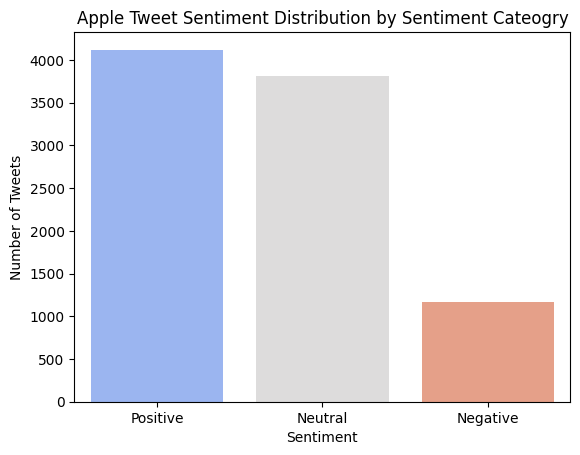

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#counting each category
sentiment_counts = df_vaderApple['vader_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])


sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Apple Tweet Sentiment Distribution by Sentiment Cateogry')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


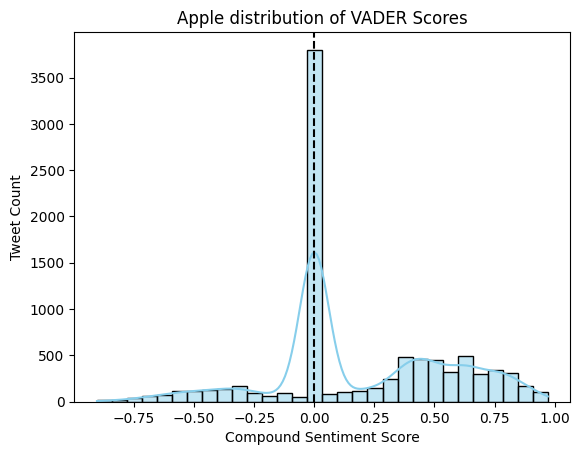

In [ ]:
#histogram of for frequency of each score
sns.histplot(df_vaderApple['compound'], bins=30, kde=True, color='skyblue')
plt.title('Apple distribution of VADER Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Tweet Count')
plt.axvline(0, color = 'black', linestyle='--')
plt.show()